### TSS-CRE distances
In this notebook, we plot the cumulative distributions of the distances of ATACseq peaks
from TranscriptionStartSites. We also plot the values after normalizing them based on the average intergenic
distance of each genome.

In [1]:
# We extract all homologous genes for each species
# (genefams is loaded in the preamble.py)
good_amphi_genes = [x for y in genefams['Bla'].dropna() for x in y]
good_zebra_genes = [x for y in genefams['Dre'].dropna() for x in y]
good_medaka_genes = [x for y in genefams['Ola'].dropna() for x in y]
good_mouse_genes = [x for y in genefams['Mmu'].dropna() for x in y]

In [2]:
(len(good_amphi_genes),len(good_zebra_genes),
    len(good_medaka_genes),len(good_mouse_genes))

(20569, 20082, 15978, 19429)

In [3]:
# for a notebook on how to make the TSS file see:
# myphdthesis/other_notebooks/make_tss.ipynb
amphi_tss_df = pd.read_csv("/home/ska/panos/Thesis_shallow/data/genomic_regions/TSS_bla.bed.gz",
                           sep='\t')
amphi_tss_df['score'] = 0
amphi_tss_df = amphi_tss_df[['chrom','start','end','gene_id','score','strand']]
amphi_tss_df = amphi_tss_df[amphi_tss_df.gene_id.isin(good_amphi_genes)]
amphi_tss_bed = BT().from_dataframe(amphi_tss_df)

zebra_tss_df = pd.read_csv("/home/ska/panos/Thesis_shallow/data/genomic_regions/TSS_dre.bed.gz",
                           sep='\t', header=None)
zebra_tss_df.columns = ['chrom','start','end','gene_id','score','strand']
zebra_tss_df = (zebra_tss_df[zebra_tss_df.gene_id.isin(good_zebra_genes)]
                .copy())
zebra_tss_bed = BT().from_dataframe(zebra_tss_df)

medaka_tss_df = pd.read_csv("/home/ska/panos/Thesis_shallow/data/genomic_regions/TSS_ola.bed.gz",
                            sep='\t', header=None)
medaka_tss_df.columns = ['chrom','start','end','gene_id','score','strand']
medaka_tss_df =( medaka_tss_df[medaka_tss_df.gene_id.isin(good_medaka_genes)]
                .copy())
medaka_tss_bed = BT().from_dataframe(medaka_tss_df)

mouse_tss_df = pd.read_csv("/home/ska/panos/Thesis_shallow/data/genomic_regions/TSS_mmu.bed.gz",
                           sep='\t', header=None)
mouse_tss_df.columns = ['chrom','start','end','gene_id','score','strand']
mouse_tss_df = mouse_tss_df[['chrom','start','end','gene_id','score','strand']]
mouse_tss_df = (mouse_tss_df[mouse_tss_df.gene_id.isin(good_mouse_genes)]
                .copy())
mouse_tss_bed = BT().from_dataframe(mouse_tss_df)

mouse_tss_df.head()

chrom    start      end             gene_id  score strand
0  chr1  3671498  3671499  ENSMUSG00000051951      0      -
1  chr1  4360314  4360315  ENSMUSG00000025900      0      -
2  chr1  4496413  4496414  ENSMUSG00000025902      0      -
3  chr1  4785710  4785711  ENSMUSG00000033845      0      -
4  chr1  4807823  4807824  ENSMUSG00000025903      0      +

### To get the average intergenic regions:

In [4]:
# for a notebook on how to make the intergenics file see:
# myphdthesis/other_notebooks/make_intergenic_regions.ipynb

amphi_intergenics = (
    pd.read_csv("/home/ska/panos/Thesis_shallow/data/genomic_regions/intergenics_Bla.tsv.gz",
    sep='\t', header=None))
amphi_aid = (amphi_intergenics[2]-amphi_intergenics[1]).mean()

zebra_intergenics = (
    pd.read_csv("/home/ska/panos/Thesis_shallow/data/genomic_regions/intergenics_Dre.tsv.gz",
    sep='\t', header=None))
zebra_aid = (zebra_intergenics[2]-zebra_intergenics[1]).mean()

medaka_intergenics = (
    pd.read_csv("/home/ska/panos/Thesis_shallow/data/genomic_regions/intergenics_Ola.tsv.gz",
    sep='\t', header=None))
medaka_aid = (medaka_intergenics[2]-medaka_intergenics[1]).mean()

mouse_intergenics = (
    pd.read_csv("/home/ska/panos/Thesis_shallow/data/genomic_regions/intergenics_Mmu.tsv.gz",
    sep='\t', header=None))
mouse_aid = (mouse_intergenics[2]-mouse_intergenics[1]).mean()

In [5]:
# the average intergenic regions, we'll use these later to normalize
amphi_aid, zebra_aid, medaka_aid, mouse_aid

(22280.674919495326,
 67502.639512022986,
 48814.903121566596,
 136213.51419155949)

In [6]:
amphi_tss_df.shape, zebra_tss_df.shape, medaka_tss_df.shape, mouse_tss_df.shape

((20569, 6), (20053, 6), (15978, 6), (18842, 6))

### In the following cells:

The species_APs_ii are ATAC peaks found only inside the intergenic regions,
This way we can investigate their distance to a gene and make sure
that those distances are not affected by the fragmenttion of the genome.    
    
species_closest then is a 

In [7]:
amphi_APs = BT(amphi_idr('merged'))
amphi_APs_ii = (amphi_APs
    .intersect(BT()
    .from_dataframe(amphi_intergenics), u=True))
amphi_closest = (amphi_APs
    .closest(b=amphi_tss_bed, D='b', io=True, t='first')
    .to_dataframe())
amphi_ii_closest = (amphi_APs_ii
    .closest(b=amphi_tss_bed, D='b', io=True, t='first')
    .to_dataframe())

zebra_APs = BT(zebra_idr('merged'))
zebra_closest = (zebra_APs
    .closest(b=zebra_tss_bed, D='b', io=True, t='first', nonamecheck=True)
    .to_dataframe())
zebra_APs_ii = (zebra_APs
    .intersect(BT()
    .from_dataframe(zebra_intergenics), u=True, nonamecheck=True))
zebra_ii_closest = (zebra_APs_ii
    .closest(b=zebra_tss_bed, D='b', io=True, t='first', nonamecheck=True)
    .to_dataframe())

medaka_APs = BT(medaka_idr('merged'))
medaka_closest = (medaka_APs
    .closest(b=medaka_tss_bed, D='b', io=True, t='first',nonamecheck=True)
    .to_dataframe())
medaka_APs_ii = (medaka_APs
    .intersect(BT()
    .from_dataframe(medaka_intergenics), u=True, nonamecheck=True))
medaka_ii_closest = (medaka_APs_ii
    .closest(b=medaka_tss_bed, D='b', io=True, t='first', nonamecheck=True)
    .to_dataframe())

mouse_APs = BT(mouse_idr('merged'))
mouse_closest = (mouse_APs
    .closest(b=mouse_tss_bed, D='b', io=True, t='first')
    .to_dataframe())
mouse_APs_ii = (mouse_APs
    .intersect(BT()
    .from_dataframe(mouse_intergenics), u=True, nonamecheck=True))
mouse_ii_closest = (mouse_APs_ii
    .closest(b=mouse_tss_bed, D='b', io=True, t='first', nonamecheck=True)
    .to_dataframe())

Some peaks will not be assigned a "closest" TSS, for example if there no TSS    
on the scaffold where the peak was found. We want to get rid of those and we do it by filtering
the rows where 'thickStart'=='.' (those are the rows with no assignment)

In [8]:
amphi_closest = amphi_closest[amphi_closest.thickStart!='.']
amphi_ii_closest = amphi_ii_closest[amphi_ii_closest.thickStart!='.']
zebra_closest = zebra_closest[zebra_closest.thickStart!='.']
zebra_ii_closest = zebra_ii_closest[zebra_ii_closest.thickStart!='.']

In [9]:
medaka_closest = medaka_closest[medaka_closest.thickStart!='.']
medaka_ii_closest = medaka_ii_closest[medaka_ii_closest.thickStart!='.']
mouse_closest = mouse_closest[mouse_closest.thickStart!='.']
mouse_ii_closest = mouse_ii_closest[mouse_ii_closest.thickStart!='.']

In [10]:
# Make the distances absolute:
amphi_closest['absdist'] = amphi_closest.blockCount.abs()
zebra_closest['absdist'] = zebra_closest.blockCount.abs()
medaka_closest['absdist'] = medaka_closest.blockCount.abs()
mouse_closest['absdist'] = mouse_closest.blockCount.abs()
amphi_ii_closest['absdist'] = amphi_ii_closest.blockCount.abs()
zebra_ii_closest['absdist'] = zebra_ii_closest.blockCount.abs()
medaka_ii_closest['absdist'] = medaka_ii_closest.blockCount.abs()
mouse_ii_closest['absdist'] = mouse_ii_closest.blockCount.abs()

## Now we manipulate a bit in order to get the data in plotting order

In [11]:
# we order our peaks by distance 
ac = amphi_closest.sort_values(by='absdist').copy()
# Then we divide the rank of each peak by the number of peaks
# this value then becomes: "what % of peaks are above me in the table?"
ac['EDCV'] = np.arange(len(ac))/len(ac)
# make a normalized absolute distance:
ac['absdist_normed'] = ac.absdist/amphi_aid
ac[['thickStart','EDCV','absdist_normed']].head()
# to-plot object:
# we drop the duplicates of 'absdist_normed' and keep only the last instance 
# of each the 'EDCV' value will be our Y acis values with the absdist_normed
# value on the X axis
tp_ac = (ac
  .drop_duplicates('absdist_normed', 
                   keep='last')[['absdist_normed', 'EDCV']]
  .to_records( index=False))

In [12]:
# repeat for the other species
zc = zebra_closest.sort_values(by='absdist').copy()
zc['EDCV'] = np.arange(len(zc))/len(zc)
zc['absdist_normed'] = zc.absdist/zebra_aid
tp_zc = (zc
    .drop_duplicates('absdist_normed',
                     keep='last')[['absdist_normed', 'EDCV']]
    .to_records( index=False))

medc = medaka_closest.sort_values(by='absdist').copy()
medc['EDCV'] = np.arange(len(medc))/len(medc)
medc['absdist_normed'] = medc.absdist/medaka_aid
tp_medc = (medc
    .drop_duplicates('absdist_normed',
                     keep='last')[['absdist_normed', 'EDCV']]
    .to_records( index=False))

mmuc = mouse_closest.sort_values(by='absdist').copy()
mmuc['EDCV'] = np.arange(len(mmuc))/len(mmuc)
mmuc['absdist_normed'] = mmuc.absdist/mouse_aid
tp_mmuc = (mmuc[mmuc.chrom !='chrY']
    .drop_duplicates('absdist_normed',
                     keep='last')[['absdist_normed', 'EDCV']]
    .to_records( index=False))

In [13]:
len(ac),len(zc),len(medc),len(mmuc)

(83471, 252774, 174139, 326486)

In [14]:
len(tp_ac),len(tp_zc),len(tp_medc),len(tp_mmuc)

(29738, 111926, 75342, 176963)

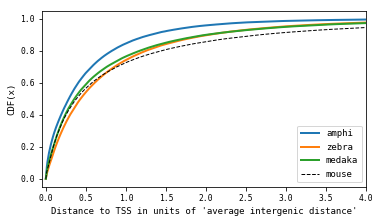

In [15]:
Fwidth = THESIS_PAGEWIDTH
Fheight = (9/16.)*Fwidth

fig, ax = plt.subplots()
fig.subplots_adjust(left=.11, bottom=.14, right=.99, top=.99)

x,y = list(zip(*tp_ac))
ax.plot(x,y, label='amphi', linewidth=2)
x,y = list(zip(*tp_zc))
ax.plot(x,y, label='zebra', linewidth=2, alpha=1, )
x,y = list(zip(*tp_medc))
ax.plot(x,y, label='medaka', linewidth=2)
x,y = list(zip(*tp_mmuc))
ax.plot(x,y, label='mouse', linewidth=1, alpha=1,
        linestyle='--' , color='black')

plt.legend(loc='lower right')
plt.xlim((-0.05,4))

#>>> Name your Axes
ax.set_ylabel(("CDF(x)"))
ax.set_xlabel(("Distance to TSS in units of 'average intergenic distance'"))

# ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")
fig.set_size_inches (Fwidth, Fheight)
#>>> OUTPUT NAME
fig.savefig('../Figures/from_notebooks/tfigure_TSSdistanceNorm.pdf')

### Now we'll do the same but without normalizing the distances

In [16]:
# we order our peaks by distance 
ac = amphi_closest.sort_values(by='absdist').copy()
# Then we divide the rank of each peak by the number of peaks
# this value then becomes: "what % of peaks are above me in the table?"
ac['EDCV'] = np.arange(len(ac))/len(ac)

# to-plot object:
# we drop the duplicates of 'absdist'
tp_ac = (ac
        .drop_duplicates('absdist', 
                keep='last')[['absdist', 'EDCV']]
        .to_records( index=False))

# repeat for the other species
zc = zebra_closest.sort_values(by='absdist').copy()
zc['EDCV'] = np.arange(len(zc))/len(zc)
tp_zc = zc.drop_duplicates('absdist',
                keep='last')[['absdist', 'EDCV']].to_records( index=False)

medc = medaka_closest.sort_values(by='absdist').copy()
medc['EDCV'] = np.arange(len(medc))/len(medc)

tp_medc = medc.drop_duplicates('absdist', 
                keep='last')[['absdist', 'EDCV']].to_records( index=False)

mmuc = mouse_closest.sort_values(by='absdist').copy()
mmuc['EDCV'] = np.arange(len(mmuc))/len(mmuc)

tp_mmuc = mmuc[mmuc.chrom !='chrY'].drop_duplicates('absdist',
                keep='last')[['absdist', 'EDCV']].to_records( index=False)

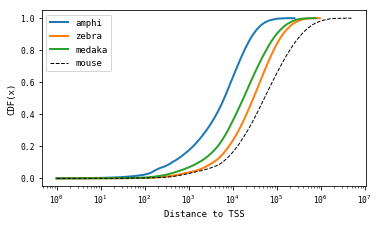

In [17]:
Fwidth = THESIS_PAGEWIDTH
Fheight = (9/16.)*Fwidth

fig, ax = plt.subplots()
fig.subplots_adjust(left=.11, bottom=.14, right=.99, top=.99)


# ax.set_title('ATACseq peak numbers overview')

x,y = list(zip(*tp_ac))
ax.plot(x,y, label='amphi', linewidth=2)
x,y = list(zip(*tp_zc))
ax.plot(x,y, label='zebra', linewidth=2, alpha=1, )
x,y = list(zip(*tp_medc))
ax.plot(x,y, label='medaka', linewidth=2)
x,y = list(zip(*tp_mmuc))

ax.plot(x,y, label='mouse', linewidth=1, alpha=1, 
        linestyle='--' , color='black')


plt.legend()
# plt.xscale('log')
# plt.xlim((10**-3,20))

#>>> Name your Axes
ax.set_ylabel(("CDF(x)"))
ax.set_xlabel(("Distance to TSS"))


plt.xscale('log')
# ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")
fig.set_size_inches (Fwidth, Fheight)
#>>> OUTPUT NAME
fig.savefig('../Figures/from_notebooks/tfigure_tssDistCDF.pdf')